<a href="https://colab.research.google.com/github/Diya-Amith/TimeSeries-CaseStudy-Assignment/blob/main/TimeSeriesCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels --quiet


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
jj_path = '/content/drive/My Drive/TimeSeries_Assignment/jj.csv'
amzn_path = '/content/drive/My Drive/TimeSeries_Assignment/AMZN.csv'

## **LOAD DATASETS**

In [5]:
#  Load datasets
def load_data(path, date_col):
    df = pd.read_csv(path)
    df.set_index(date_col, inplace=True)
    return df
jj_data = load_data(jj_path, 'date')
amzn_data = load_data(amzn_path, 'Date')

In [6]:
print("Johnsons and johnsons data",jj_data.head())
print("Amazon Data",amzn_data.head())

Johnsons and johnsons data             data
date            
1960-01-01  0.71
1960-04-01  0.63
1960-07-02  0.85
1960-10-01  0.44
1961-01-01  0.61
Amazon Data                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503  129984000
2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004  126088000
2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   97162000
2018-02-23  74.766998  75.000000  74.324997  75.000000  75.000000   88362000
2018-02-26  75.459999  76.141998  75.349998  76.097504  76.097504   99100000


## **INITIAL PLOTS**

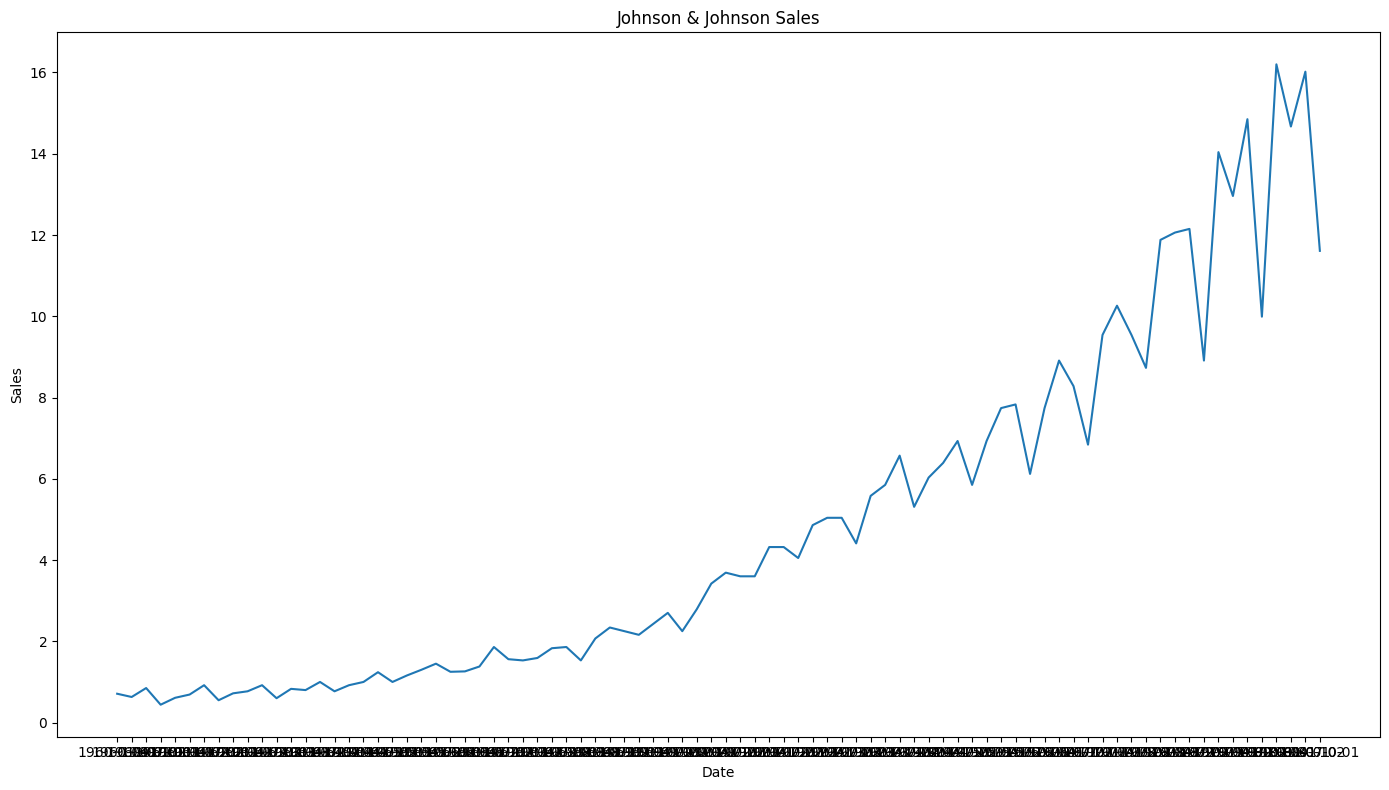

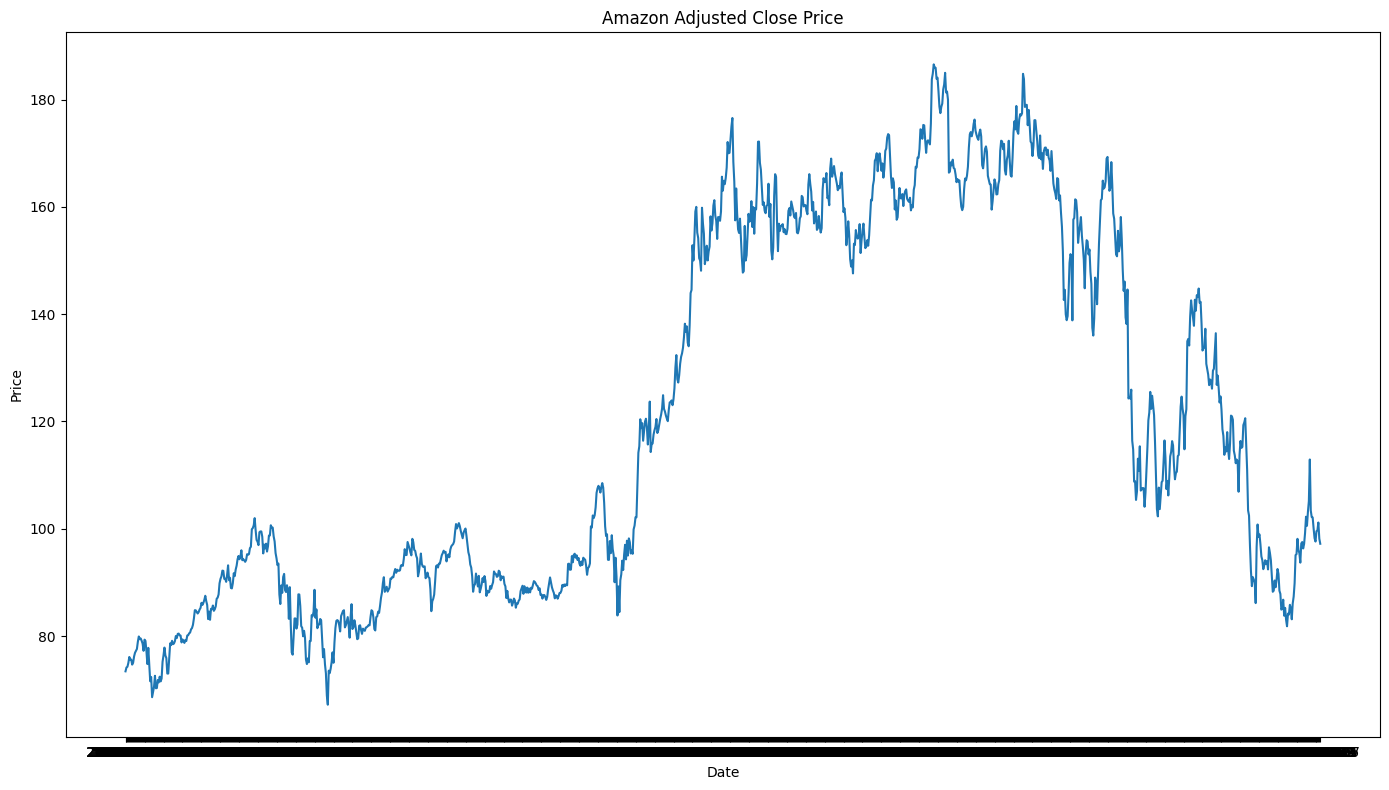

In [7]:
def plot_time_series(series, title, ylabel):
    plt.figure(figsize=(14, 8))
    plt.plot(series)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_time_series(jj_data['data'], "Johnson & Johnson Sales", "Sales")
plot_time_series(amzn_data['Adj Close'], "Amazon Adjusted Close Price", "Price")


## **STATIONARY /  NON-STATIONARITY TEST**

### **ACF & PACF Plots**

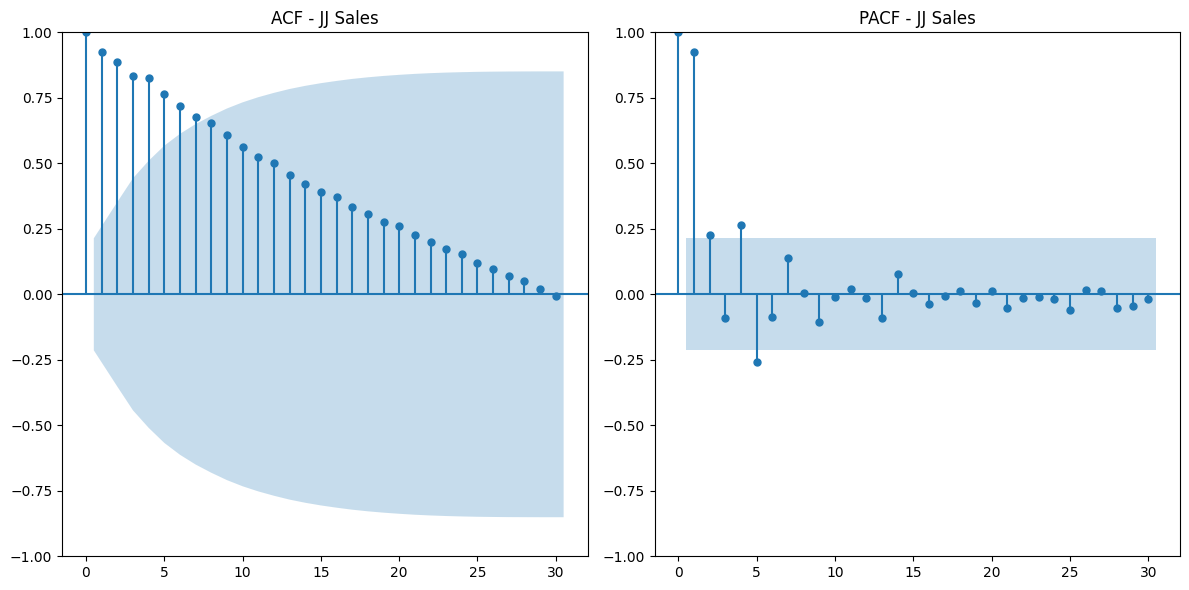

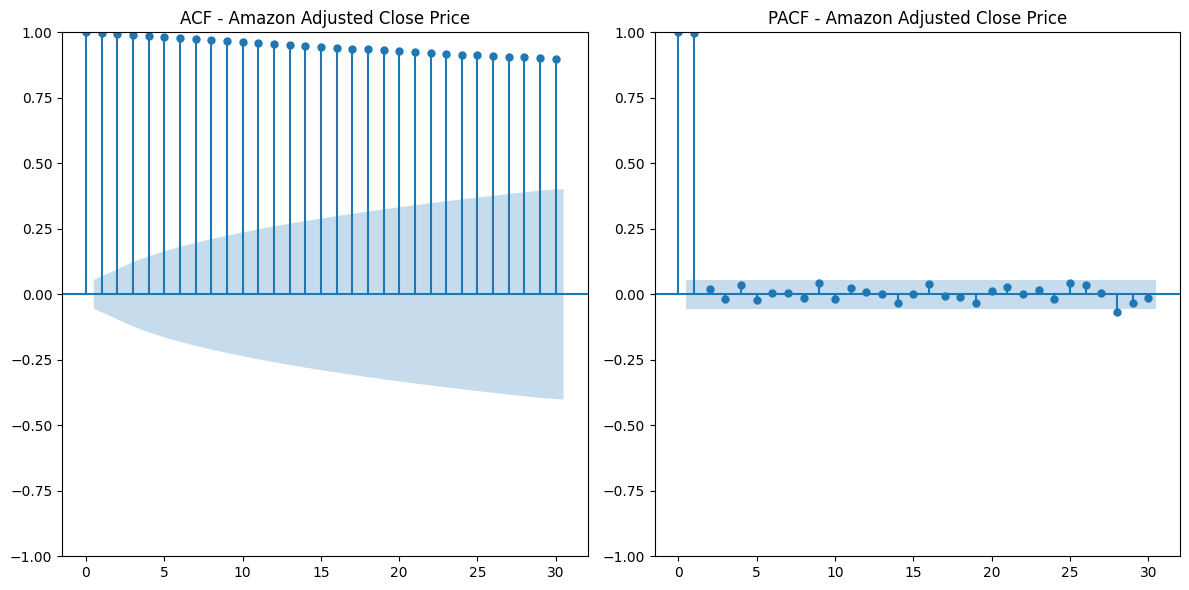

In [8]:
def plot_acf_pacf(series, lags=30, title=''):
    plt.figure(figsize=(12, 6))

    # ACF Plot
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF - {title}')

    # PACF Plot
    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF - {title}')

    plt.tight_layout()
    plt.show()

plot_acf_pacf(jj_data['data'], lags=30, title='JJ Sales')
plot_acf_pacf(amzn_data['Adj Close'], lags=30, title='Amazon Adjusted Close Price')

### **ADF Test**

In [9]:
def adf_test(series, title=''):
    print(f"\n--- ADF Test: {title} ---")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

adf_test(jj_data['data'], "JJ Sales")
adf_test(amzn_data['Adj Close'], "Amazon Adjusted Close Price")


--- ADF Test: JJ Sales ---
ADF Statistic: 2.7420165734574744
p-value: 1.0
Non-Stationary

--- ADF Test: Amazon Adjusted Close Price ---
ADF Statistic: -1.6578089913331728
p-value: 0.45297105465166737
Non-Stationary


### **Log Transform**

In [10]:
# Log Transform and First Differencing for JJ Sales
def log_transform_and_difference_jj(data):
    data['data_log'] = np.log(data['data'])
    data['data_tr_1'] = data['data_log'].diff()
    return data

# Log Transform and First Differencing for Amazon Adjusted Close Price
def log_transform_and_difference_amzn(data):
    data['Adj_Close_log'] = np.log(data['Adj Close'])
    data['Adj_Close_tr_1'] = data['Adj_Close_log'].diff()
    return data

jj_data = log_transform_and_difference_jj(jj_data)
amzn_data = log_transform_and_difference_amzn(amzn_data)

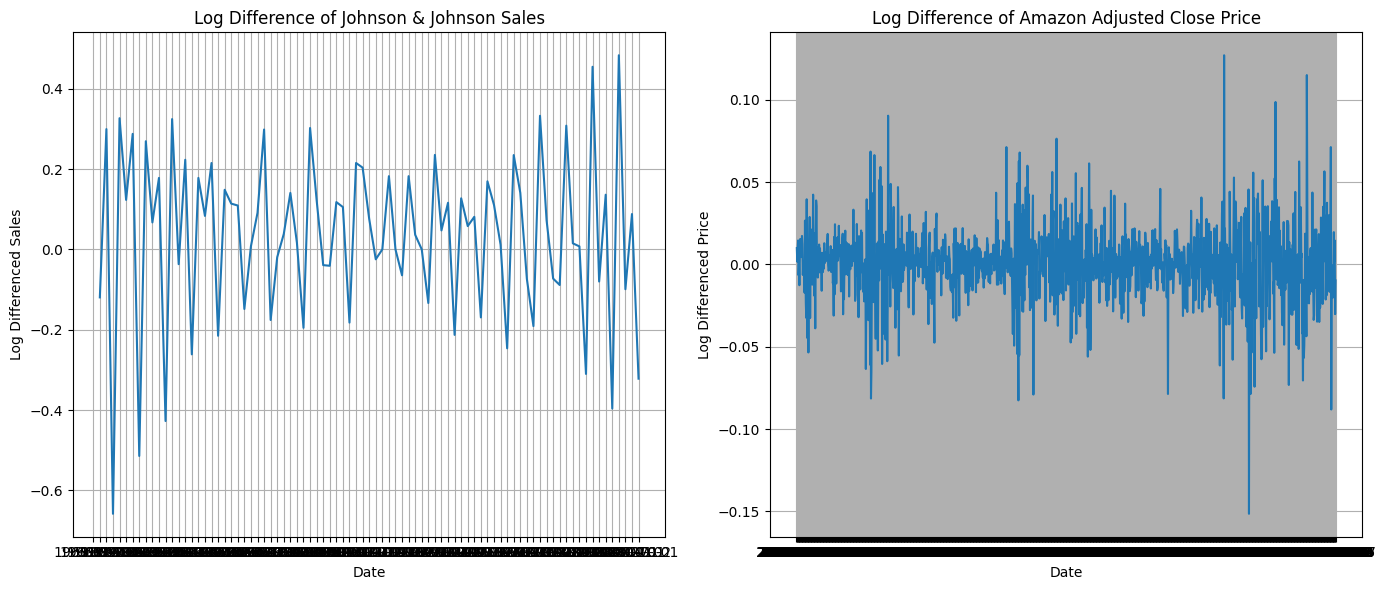

In [11]:
def plot_log_diff_series(jj_series, amzn_series):
    plt.figure(figsize=(14, 6))

    # JJ Sales
    plt.subplot(121)
    plt.plot(jj_series)
    plt.title("Log Difference of Johnson & Johnson Sales")
    plt.xlabel('Date')
    plt.ylabel('Log Differenced Sales')
    plt.grid(True)

    # Amazon Adjusted Close Price
    plt.subplot(122)
    plt.plot(amzn_series)
    plt.title("Log Difference of Amazon Adjusted Close Price")
    plt.xlabel('Date')
    plt.ylabel('Log Differenced Price')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_log_diff_series(jj_data['data_tr_1'], amzn_data['Adj_Close_tr_1'])

### **Re-Run ADF Test**

In [17]:
def adf_test(data, column_name):
    adf_result = adfuller(data[column_name].dropna())
    print(f"\n--- ADF Test: {column_name} ---")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    if adf_result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

adf_test(jj_data, 'data_tr_1')
adf_test(amzn_data, 'Adj_Close_tr_1')


--- ADF Test: data_tr_1 ---
ADF Statistic: -4.317043945811837
p-value: 0.00041497314044406584
Stationary

--- ADF Test: Adj_Close_tr_1 ---
ADF Statistic: -36.639832812749425
p-value: 0.0
Stationary


### **Re-Run ACF & PACF Plots**

## **ARMA MODEL**

### **Define Model**